<Axes: >

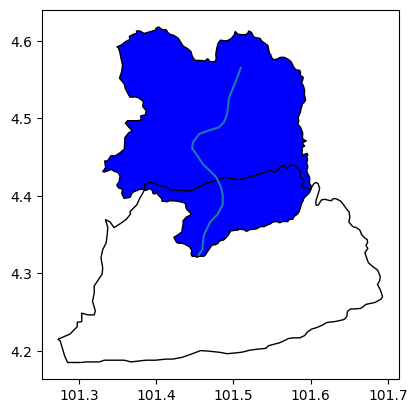

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

SA1 = gpd.read_file(r"D:\CS\GitHub\Qt\Data representation\dataset_geoprocessing_applications\Study_Area_1.shp")
SA2 = gpd.read_file(r"D:\CS\GitHub\Qt\Data representation\dataset_geoprocessing_applications\Study_Area_2.shp")
river = gpd.read_file(r"D:\CS\GitHub\Qt\Data representation\dataset_geoprocessing_applications\river.shp")

fig,ax = plt.subplots()
SA1.plot(ax=ax, color = 'blue',edgecolor = 'black')
SA2.plot(ax=ax, color = 'none',edgecolor = 'black')
river.plot(ax=ax)

<Axes: >

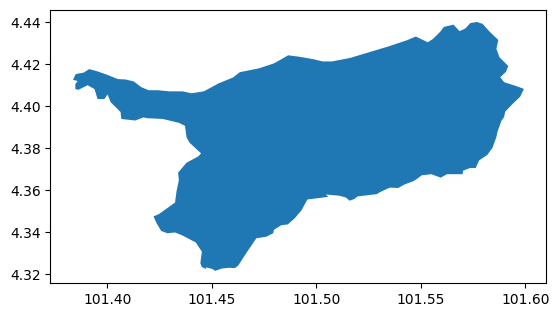

In [3]:
#Intersection of polygons

intersection = gpd.overlay(SA1,SA2, how = "intersection")
intersection.plot()

<Axes: >

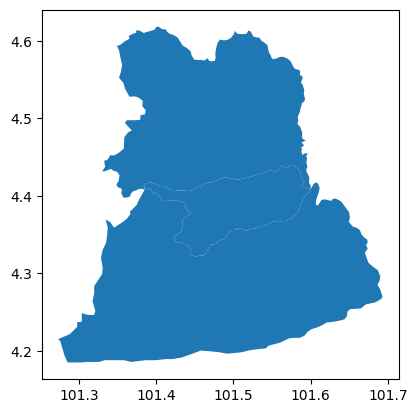

In [4]:
#Union of polygons

union = gpd.overlay(SA1,SA2, how = "union")
union.plot()

<Axes: >

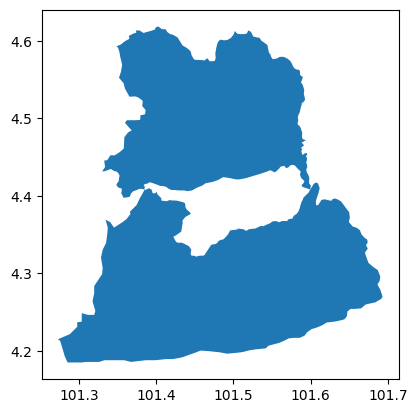

In [6]:
#Symmetric Difference of Polygons
sd = gpd.overlay(SA1,SA2, how = "symmetric_difference")
sd.plot()

<Axes: >

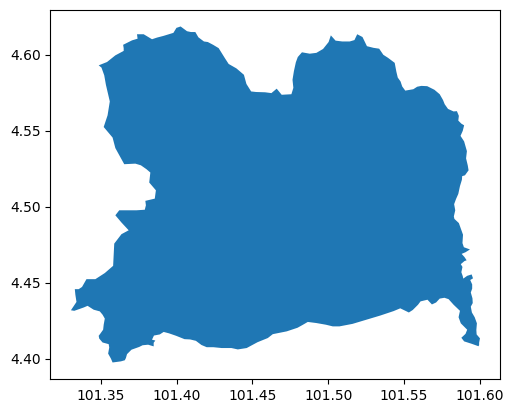

In [7]:
#Difference of Polygons

difference = gpd.overlay(SA1,SA2,how = "difference")
difference.plot()

<Axes: >

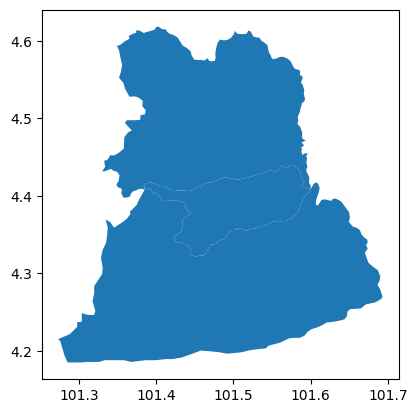

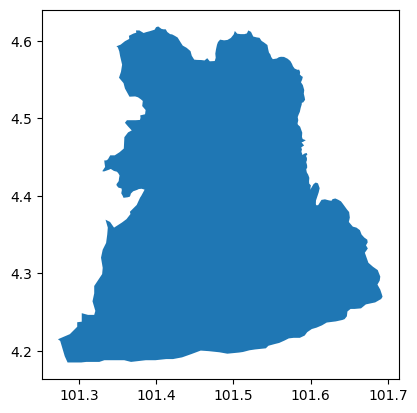

In [11]:
#Dissolve

union.plot()
union["common_column"]=1
dissolved_sa = union.dissolve(by = "common_column")
dissolved_sa.plot()

<Axes: >

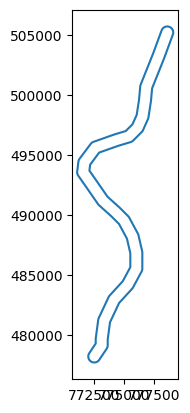

In [39]:
#Buffer(a buffer distance around the geoseries)

#Reporojecting the river GeoPandas GeoDataFrame into a projected CRS
river_projected = river.to_crs(epsg = 24547)
buffer_500m = river_projected['geometry'].buffer(distance=500)
buffer_500m.boundary.plot()

C:\Users\Nirman\AppData\Local\Temp\ipykernel_15608\3967203528.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = union['geometry'].centroid


<Axes: >

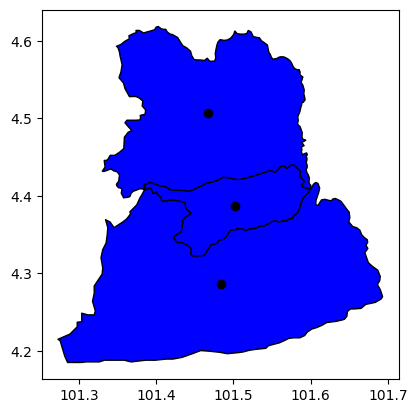

In [21]:
#Obtaining the centroid(also can be applied to only geoseries)

fig,ax1 = plt.subplots()

union.plot(ax=ax1,color = 'blue',edgecolor='black')
centroid = union['geometry'].centroid
centroid.plot(ax=ax1,color = 'black')

<Axes: >

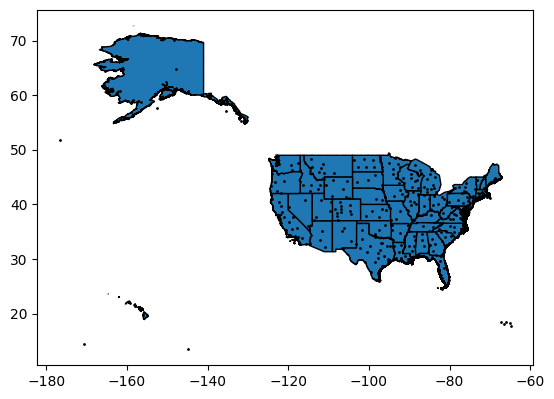

In [72]:
# XY Coordinated to Point Geometries

import pandas as pd
from shapely.geometry import Point

airports_data = pd.read_csv(r'D:\CS\GitHub\Qt\Data representation\dataset_geoprocessing_applications\us_airports.csv')

#Importing the states ESRI shapefile of USA
us_states = gpd.read_file(r"D:\CS\GitHub\Qt\Data representation\dataset_geoprocessing_applications\us_states.shp")

geometry = [Point(xy) for xy in zip(airports_data['LONGITUDE'],airports_data['LATITUDE'])]

#Creating a new GeoDataFrame

airports_us = gpd.GeoDataFrame(airports_data, geometry = geometry, crs = us_states.crs)
fig,ax2 = plt.subplots()
us_states.plot(ax=ax2,edgecolor = 'black')
airports_us.plot(ax=ax2,color='black',markersize = 1)


In [67]:
#Attribute joins

#Importing the CSV which consists of state names and codes
state_names_codes = pd.read_csv(r'D:\CS\GitHub\Qt\Data representation\dataset_geoprocessing_applications\state names and codes.csv')

#Renaming the column heading
airports_us.rename(columns = {"STATE":"state_code"},inplace = True)

#Join attributes(states added based on codes)
airports_us = airports_us.merge(state_names_codes, on = 'state_code')

C:\Users\Nirman\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,AIRPORT,geometry,index_right,NAME_1
0,Albuquerque International,POINT (-106.60919 35.04022),31,New Mexico
1,Ted Stevens Anchorage International,POINT (-149.99619 61.17432),1,Alaska
2,William B Hartsfield-Atlanta Intl,POINT (-84.42694 33.64044),10,Georgia
3,Austin-Bergstrom International,POINT (-97.66987 30.19453),43,Texas
4,Bradley International,POINT (-72.68323 41.93887),6,Connecticut
...,...,...,...,...
334,Eglin Air Force Base,POINT (-86.52540 30.48325),9,Florida
336,Yellowstone,POINT (-111.11764 44.68840),26,Montana
337,Northwest Arkansas Regional,POINT (-94.30681 36.28187),3,Arkansas
338,Yakutat,POINT (-139.66023 59.50336),1,Alaska


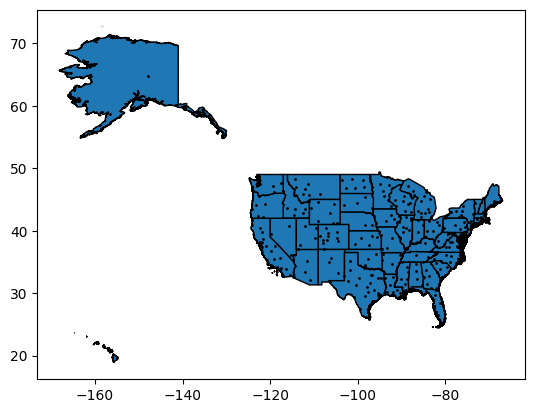

In [77]:
fig,ax2 = plt.subplots()
airports_us = airports_us[['AIRPORT','geometry']]
us_states.plot(ax=ax2,edgecolor = 'black')
airports_us.plot(ax=ax2,color='black',markersize = 1)

#Spatial Join

airports_us = gpd.sjoin(airports_us, us_states, how = 'inner', op = 'intersects')
airports_us